In [1]:
import numpy as np
from scipy.fft import fft2,ifft2,fftfreq,fftshift,ifftshift
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cmath
from scipy.special import jn
import matplotlib.patches as patches

In [2]:
def Optica(U0,X,Y,z,lamb):
    A = (fft2((U0)))
    Lx = np.max(abs(X))
    Ly= np.max(abs(Y))

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    


    fx = ( fftfreq(len(U0),deltax) )  
    fy = ( fftfreq(len(U0),deltay) )   
    
    #kx = ( fftfreq( len(X[0]), abs(X[0][0]-X[0][1])))
    #ky = ( fftfreq(len(Y[0]), abs(Y[1][0]-Y[0][0])))
    
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ( ifft2( ( A*np.exp(sqrt_u) ) ) )

In [3]:
def FiguraOptica2(U0,X,Y,lamb,z,z0,n):
  ZX,ZY,ZD=[],[],[]

  for j in range(n//2):
    gg = z0[-1]*j
    for i in range(len(z0)): 
      ZX.append( np.ones(len(X[0])) )

  uu = U0.copy()
  uu[U0 == 0 ]= 3
  ZX.append( uu[len(uu)//2] )
  ZX.append( uu[len(uu)//2] )
  ZX.append( uu[len(uu)//2] )

  for j in range(n//2+1,n):
    gg = z0[-1]*j
    for i in range(len(z0)): 
      U = Optica(U0,X,Y,z0[i]+gg,lamb)
      ZX.append( abs(U[len(U0)//2])**2 )

  gg = (n)//2*(z0[-1] + abs(z[0]-z[1]))
  for i in range(len(z)):
    U = Optica(U0,X,Y,z[i]+gg,lamb)
    ZX.append(abs(U[len(U0)//2])**2)

    
  return ZX,ZY,ZD

In [7]:
N = 6*512#2**10
R= 12
x = np.linspace(-9*R,9*R,N,endpoint=False)
X,Y = np.meshgrid(x,x)
lamb = 0.632/1000

nn = len(x[abs(x)<1.2*R])
L = np.array([10,10])

zz = np.linspace(0,1800*R,nn)

z = np.arange(0,1800*R-20,abs(zz[0]-zz[1]))
#Escala um
z0 = np.arange(0,L[0],abs(zz[0]-zz[1]))


ZX,ZY,ZD = FiguraOptica2((X**2+Y**2>R**2).astype(float),X,Y,lamb,z,z0,2)
#z0 = np.linspace(0,np.sum(L)//2,40)
#z = np.linspace(0,10*R,10 )


In [8]:
N = 7000#2**10

x0 = np.linspace(-9*R,9*R,N,endpoint=False)
X,Y = np.meshgrid(x0,x0)
U = Optica((X**2+Y**2>R**2).astype(float),X,Y,z[-40],lamb)

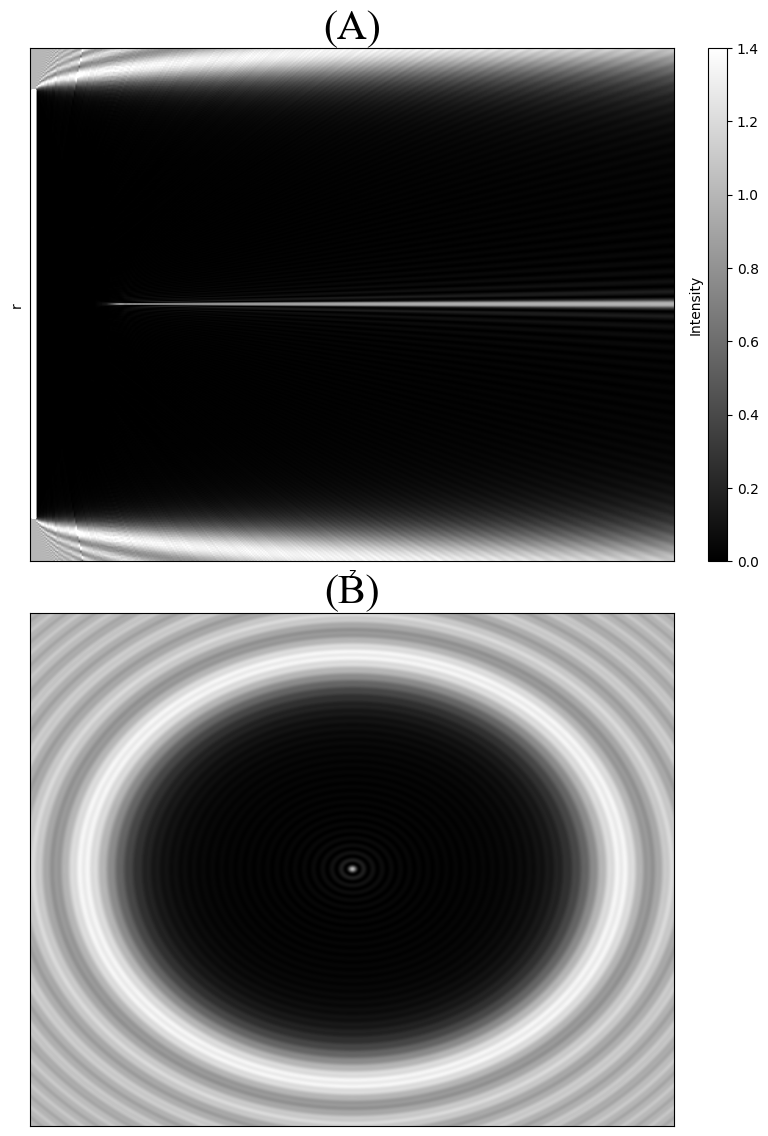

In [11]:
fig = plt.figure(figsize=(9,14))
gs = gridspec.GridSpec(2,2 ,width_ratios=[1,0.03],wspace=0.1,hspace=0.1)  # Adjust `wspace` to control space between columns

vmin,vmax =0 ,1.4
ax0 = fig.add_subplot(gs[0, 0])
img = ax0.imshow( np.transpose(ZX)[abs(x)<1.2*R] , cmap='gray' , aspect = 'auto', extent=[ -10,z[-1]+10,-1.2*R, 1.2*R],vmin=vmin,vmax=vmax)

ax0.set_ylabel(r'r')
ax0.set_yticks([])
ax0.set_xlabel('z')
ax0.set_xticks([])

ax0.set_title('(A)',fontname='Times New Roman', fontsize=30)



ax_cb = fig.add_subplot(gs[0, 1])
cbar = plt.colorbar(img, cax=ax_cb)
# Adjust the title (label) of the color bar
cbar.set_label("Intensity")  # Adjust the distance and position
cbar.ax.yaxis.set_label_position("left")  # Ensure the label is on the right side


ax0 = fig.add_subplot(gs[1, 0])
U0 = abs(U)**2

ax0.imshow(np.transpose(U0[abs(x0)<1.5*R])[abs(x0)<1.5*R], cmap = 'gray', aspect='auto',vmin=vmin,vmax=vmax)

ax0.set_yticks([])
ax0.set_xticks([])
#ax0.set_xticks([])


ax0.set_title('(B)',fontname='Times New Roman', fontsize=30)



plt.savefig('Analitico-rev.svg',dpi=300)